In [1]:
# Importar Bibliotecas necesarias

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#cargo los datos
df = pd.read_csv ("Cleaned-Data.csv")

df.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

La columna que utilizaremos pare predecir que sera contanto donde identificaremos que tanto influye el contacto en las personas que estan enfermas de COVID 19.


In [4]:
def find_CONTACTO(row):
    cols = list(row.index)
    index = cols.index('Contact_Dont-Know')
    for i in range(index, len(cols)):
        if row[i] == 1:
            return i - index
    return -1

df['Contact'] = df.apply(lambda row: find_CONTACTO(row), axis=1)
df.drop(['Contact_Dont-Know','Contact_No', 'Contact_Yes'], axis=1, inplace=True)
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Country,Contact
0,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,China,2
1,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,China,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,China,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,China,2
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,China,1


Edad VS Contagio

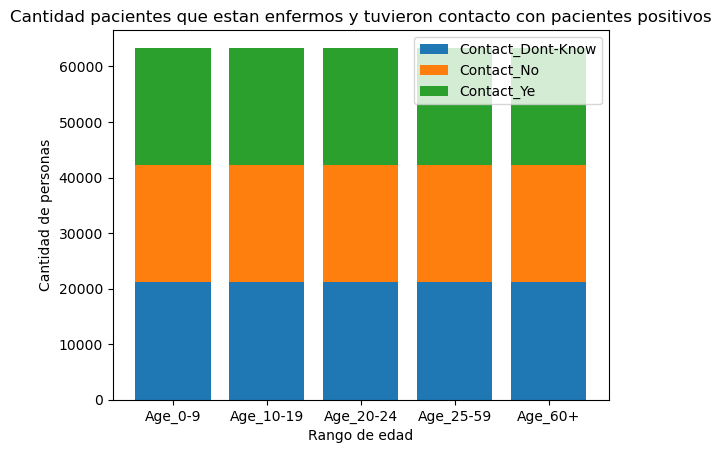

In [5]:
df_age_contact = df[['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Contact']]

# Calculo la cantidad de personas en cada rango de edad si estuvieron contacto con contagiados

contact_by_age = df_age_contact.groupby('Contact').sum()

# Graficar los resultados
plt.bar(contact_by_age.columns, contact_by_age.loc[0], label='Contact_Dont-Know')
plt.bar(contact_by_age.columns, contact_by_age.loc[1], label='Contact_No', bottom=contact_by_age.loc[0])
plt.bar(contact_by_age.columns, contact_by_age.loc[2], label='Contact_Ye', bottom=contact_by_age.loc[0]+contact_by_age.loc[1])
plt.title('Cantidad pacientes que estan enfermos y tuvieron contacto con pacientes positivos')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de personas')
plt.legend()
plt.show()

In [6]:
# Obtener una lista de países únicos en la columna de "Country"
unique_countries = df['Country'].unique()

# Crear un diccionario de mapeo de países a números
country_mapping = {country: i for i, country in enumerate(unique_countries)}

# Imprimir el diccionario de mapeo
print(country_mapping)

# Aplicar el mapeo a la columna de "Country"
df['Country'] = df['Country'].map(country_mapping)
{'China': 0, 'Italy': 1, 'Iran': 2, 'Republic of Korean': 3, 'France': 4, 'Spain': 5, 'Germany': 6, 'UAE': 7, 'Other-EUR': 8, 'Other': 9}
df.head()

{'China': 0, 'Italy': 1, 'Iran': 2, 'Republic of Korean': 3, 'France': 4, 'Spain': 5, 'Germany': 6, 'UAE': 7, 'Other-EUR': 8, 'Other': 9}


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Country,Contact
0,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,2
1,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,2
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,1


In [7]:
var_Y = ['Contact']
var_X = [v for v in df if v not in var_Y]
y = df['Contact']
X = df[var_X]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [8]:
# Crear el modelo K-NN con k=5#knn = KNeighborsClassifier(n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [11]:
# Realizar predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 16.51%
